# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [39]:
df = pd.read_csv("dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
df.isna().sum().sum() # no null values

0

In [41]:
#values I will change into numeric
print(df.region.unique().tolist())
print(df.sex.unique().tolist())
print(df.smoker.unique().tolist())

['southwest', 'southeast', 'northwest', 'northeast']
['female', 'male']
['yes', 'no']


In [42]:
# binary values to numeric
df["sex"].replace(to_replace=['female', 'male'], value=[1, 0],inplace=True)
df["smoker"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
#nominal values to one hot encode
df = pd.get_dummies(data=df)
df = df[["sex","smoker","children","region_northeast","region_northwest","region_southeast","region_southwest","age","bmi","charges"]]

In [43]:
df.head()

,sex,smoker,children,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,charges
0,1,1,0,0,0,0,1,19,27.900,16884.92400
1,0,0,1,0,0,1,0,18,33.770,1725.55230
2,0,0,3,0,0,1,0,28,33.000,4449.46200
3,0,0,0,0,1,0,0,33,22.705,21984.47061
4,0,0,0,0,1,0,0,32,28.880,3866.85520


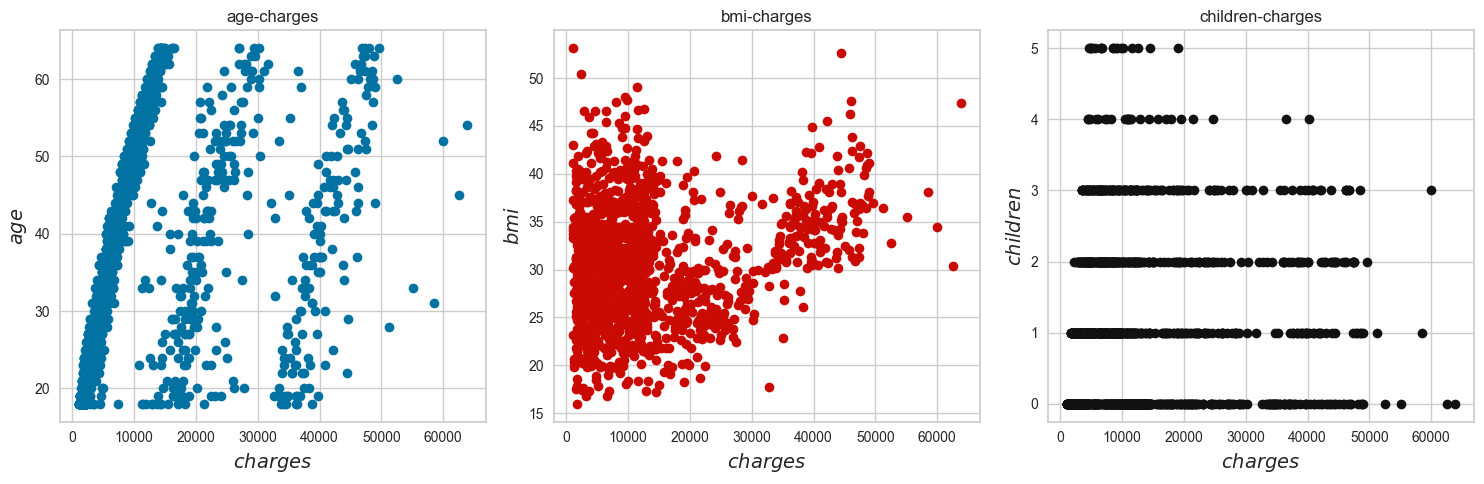

In [44]:
def plotdata(df):
    x = df["charges"]
    y1 = df["age"]
    y2 = df["bmi"]
    y3 = df["children"]

    fig1, ax1 = plt.subplots(ncols = 3, figsize = (15,5))
    ax1[0].plot(x, y1, "bo")
    ax1[0].set_title("age-charges")
    ax1[0].set_xlabel(r'$charges$', fontsize = 14)
    ax1[0].set_ylabel(r'$age$', fontsize = 14)

    ax1[1].plot(x, y2, "ro")
    ax1[1].set_title("bmi-charges")
    ax1[1].set_xlabel(r'$charges$', fontsize = 14)
    ax1[1].set_ylabel(r'$bmi$', fontsize = 14)

    ax1[2].plot(x, y3, "ko")
    ax1[2].set_title("children-charges")
    ax1[2].set_xlabel(r'$charges$', fontsize = 14)
    ax1[2].set_ylabel(r'$children$', fontsize = 14)

    plt.tight_layout()
    plt.show()
plotdata(df)

<AxesSubplot: >

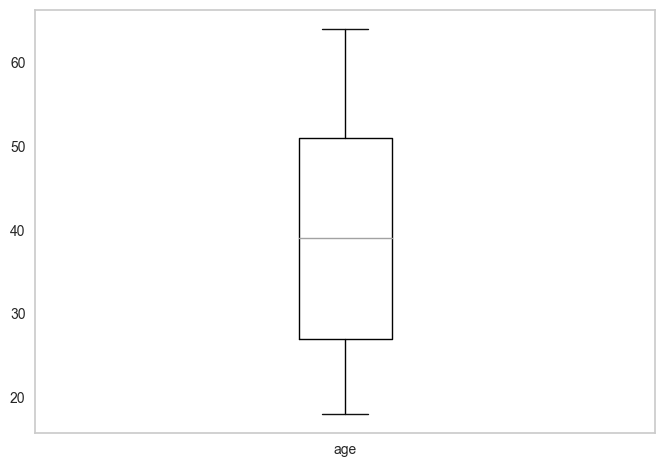

In [45]:
#Checking for outliers

df.boxplot("age",grid=False) # Age attribute has no extreme values.

<AxesSubplot: >

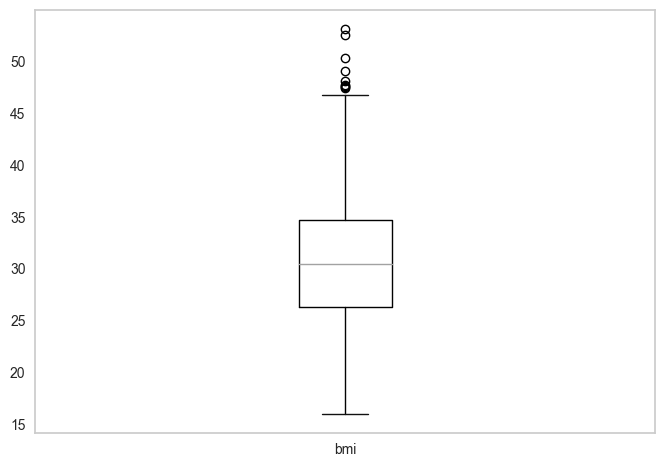

In [46]:
df.boxplot("bmi",grid=False) ## bmi > 50 values are outliers.

<AxesSubplot: >

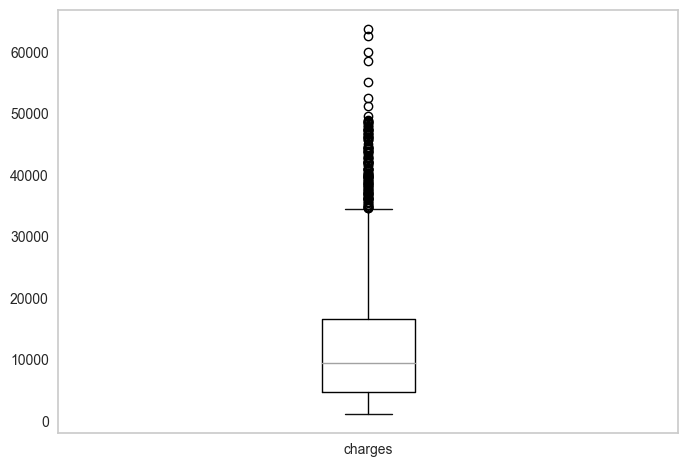

In [47]:
df.boxplot("charges",grid=False) # Charges > 40000 are outliers.

In [48]:
df.drop(df[df["bmi"] > 50].index , axis = 0 , inplace= True)
df.drop(df[df["charges"] > 40000].index, axis=0 , inplace= True)

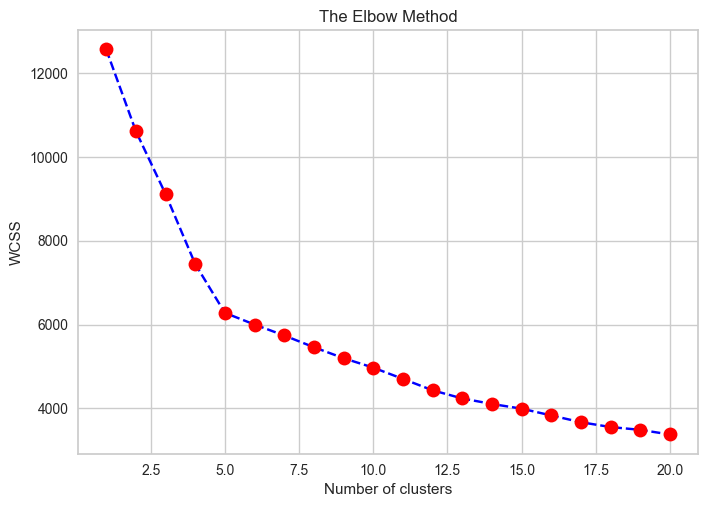

In [49]:
new_df = df.values
scaler = StandardScaler()
df2 = scaler.fit_transform(new_df)

def find_optimal_num_clusters(data, max_k):
    """
    Find the optimal number of clusters for K-Means using the elbow method
    
    Parameters:
    - data: the data to cluster, in the form of a numpy array
    - max_k: the maximum number of clusters to consider
    
    Returns:
    - The optimal number of clusters, according to the elbow method
    """
    
    # Initialize empty list to store within-cluster sum of squared errors (WCSS)
    wcss = []
    
    # Iterate over a range of possible number of clusters
    for i in range(1, max_k+1):
        # Initialize KMeans model with current number of clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        # Fit model to data
        kmeans.fit(data)
        # Append WCSS for current model to list
        wcss.append(kmeans.inertia_)
    
    # Plot WCSS for each number of clusters
    plt.plot(range(1, max_k+1), wcss,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    # Find index of minimum WCSS
    optimal_idx = wcss.index(min(wcss))
    
    return optimal_idx + 1
optimal_num_clusters = find_optimal_num_clusters(df2, 20)

#### So the best cluster number is 5

<AxesSubplot: xlabel='Clusters', ylabel='count'>

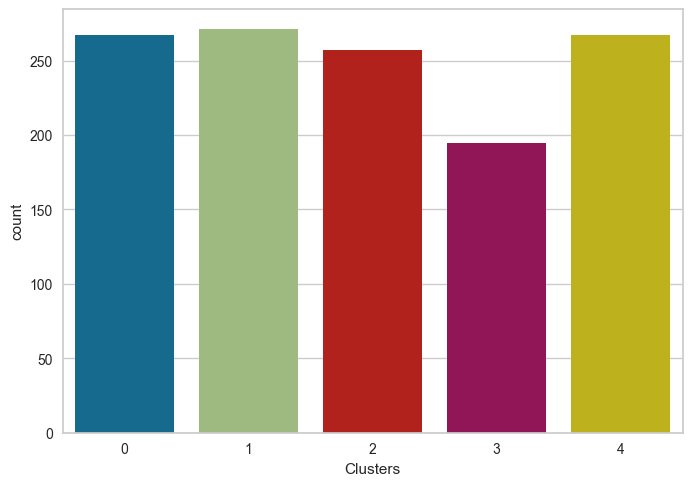

In [50]:
kmeans = KMeans(n_clusters=5, random_state=42)
predictions = kmeans.fit_predict(df2)
df3 = df.copy()
df3["Clusters"] = predictions
sns.countplot(x = df3["Clusters"])

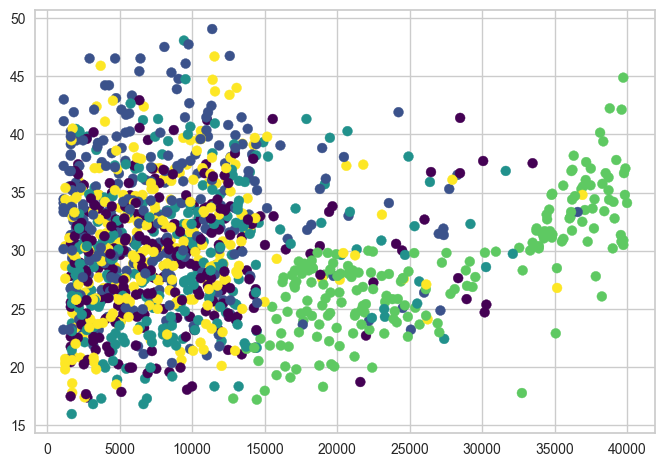

In [51]:
#we cannot use scatter plot for multidimensional data we have to use pca
plt.scatter(df3["charges"], df3["bmi"], c=df3["Clusters"], s=50, cmap='viridis')

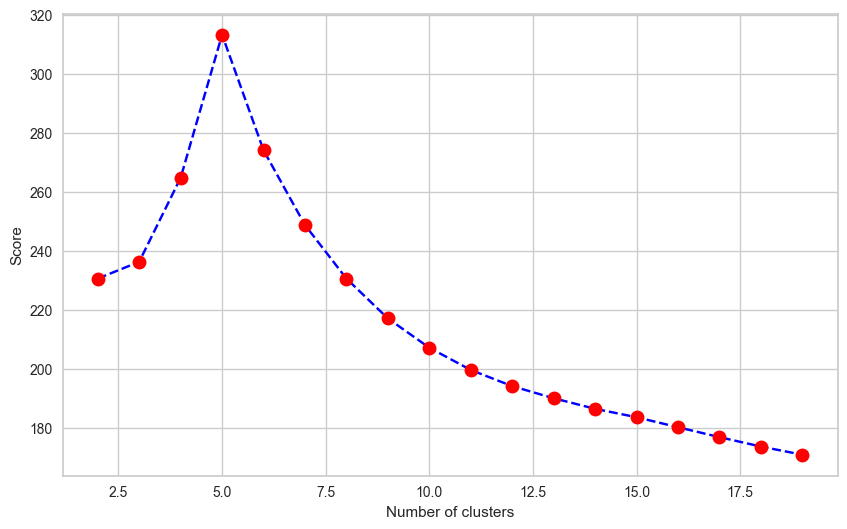

In [52]:
distance_metric = "euclidean"

# Initialize an empty list to store the scores
scores = []

# Iterate over a range of values for k
for k in range(2, 20):
    # Fit the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=k, affinity=distance_metric)
    model.fit(df2)
    
    # Predict the labels for the data
    labels = model.labels_
    
    # Compute the score and append it to the list
    score = calinski_harabasz_score(df2, labels)
    scores.append(score)

# Plot the scores
plt.figure(figsize=(10,6))
plt.plot(range(2,20),scores,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()

### K = 5

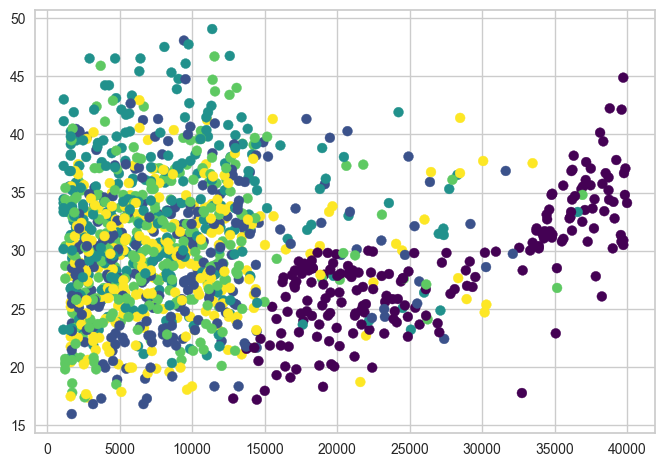

In [53]:
#we cannot use scatter plot for multidimensional data we have to use pca
model = AgglomerativeClustering(n_clusters=5, affinity=distance_metric)
model.fit(df2)
# Predict the labels for the data
labels = model.labels_
plt.scatter(df3["charges"], df3["bmi"], c=labels, s=50, cmap='viridis')

Mean silhoutte score for all points in K-Means:  0.316
Mean silhoutte score for all points in Agglomerative Clustering:  0.3158


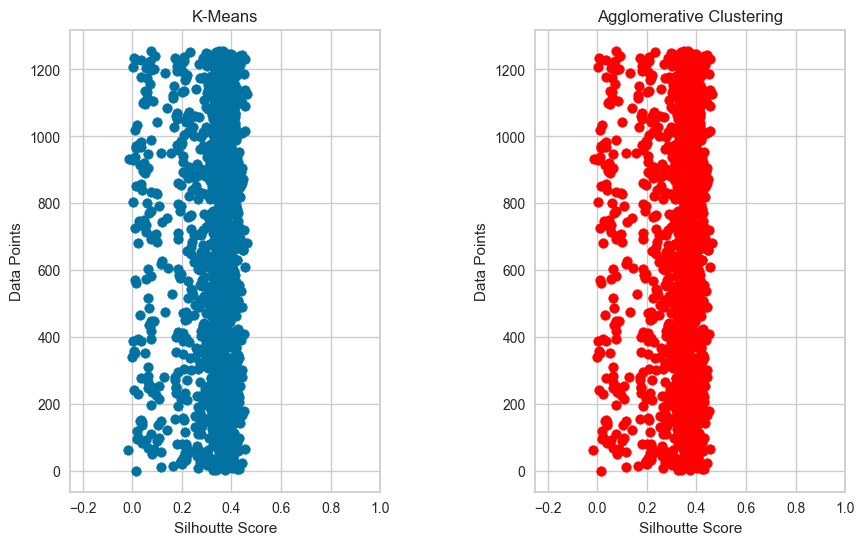

In [54]:
model_agg = AgglomerativeClustering(n_clusters=5, affinity=distance_metric)
kmeans = KMeans(n_clusters=5, random_state=42)

label_k = kmeans.fit_predict(df2)
label_agg = model_agg.fit_predict(df2)

silh_k = silhouette_samples(df2,label_k)
silh_agg = silhouette_samples(df2,label_agg)

fig = plt.figure()
fig.subplots(1,2)

fig.subplots_adjust(wspace= 0.5)
fig.set_size_inches(10,6)
plt.subplot(121)
plt.xlim(-0.25,1)
plt.scatter(silh_k,range(len(silh_k)))
plt.xlabel("Silhoutte Score")
plt.ylabel("Data Points")
plt.title("K-Means")

plt.subplot(122)
plt.xlim(-0.25,1)
plt.scatter(silh_agg,range(len(silh_agg)),color = "red")
plt.xlabel("Silhoutte Score")
plt.ylabel("Data Points")
plt.title("Agglomerative Clustering")




print("Mean silhoutte score for all points in K-Means: " , silh_k.mean().round(3))
print("Mean silhoutte score for all points in Agglomerative Clustering: " , silh_agg.mean().round(4))

#We can say that agglomerative clustering is performing better because it has higher silhoutte score in average.

